<a href="https://colab.research.google.com/github/tlkt/mofan_work/blob/master/402_RNN_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch

In [0]:
import os
import torch
import torch.nn as nn
import torch.utils.data as Data
import torchvision.datasets as dset
import matplotlib.pyplot as plt
from torch.autograd import Variable
import torchvision.transforms as transform

In [0]:
EPOCH = 1               # train the training data n times, to save time, we just train 1 epoch
BATCH_SIZE = 64
TIME_STEP = 28          # rnn time step / image height
INPUT_SIZE = 28         # rnn input size / image width
LR = 0.01               # learning rate
DOWNLOAD_MNIST = True   # set to True if haven't download the data

In [4]:
train_data = dset.MNIST(root='./mnist',train=True,transform=transform.ToTensor(),download=DOWNLOAD_MNIST)


Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw



Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw



Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw
Processing...
Done!


In [5]:
train_data.train_data.size()

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


torch.Size([60000, 28, 28])

In [9]:
train_data.train_labels.size()

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


torch.Size([60000])

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


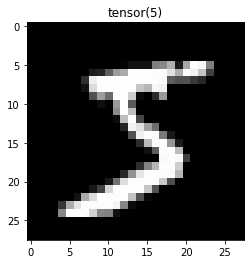

In [11]:
plt.imshow(train_data.train_data[0].numpy(),cmap='gray')
plt.title(train_data.train_labels[0])
plt.show()

In [0]:
train_loader = Data.DataLoader(train_data,batch_size=BATCH_SIZE,shuffle=True,num_workers=2)

In [0]:
test_data = dset.MNIST(root='./mnist',train=False,transform=transform.ToTensor(),download=DOWNLOAD_MNIST)

In [15]:
test_x = test_data.test_data.type(torch.FloatTensor)[:2000]/255.

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:60: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


In [17]:
test_y = test_data.test_labels.numpy()[:2000]

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [0]:
class RNN(nn.Module):
  def __init__(self):
    super(RNN,self).__init__()
    self.rnn = nn.LSTM(
        input_size=INPUT_SIZE,
        hidden_size=64,
        num_layers=2,
        batch_first=True
    )
    self.out = nn.Linear(64,10)
  
  def forward(self,x):
    r_out,(h_n,h_c) = self.rnn(x,None)
    out = self.out(r_out[:,-1,:])
    return out


In [0]:
rnn = RNN()

In [20]:
rnn

RNN(
  (rnn): LSTM(28, 64, num_layers=2, batch_first=True)
  (out): Linear(in_features=64, out_features=10, bias=True)
)

In [0]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.CrossEntropyLoss()  

In [22]:
for epoch in range(EPOCH):
  for step,(b_x,b_y) in enumerate(train_loader):
    b_x = b_x.view(-1,28,28)
    output = rnn(b_x)
    loss = loss_func(output,b_y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if step % 50 == 0:
        test_output = rnn(test_x)                   # (samples, time_step, input_size)
        pred_y = torch.max(test_output, 1)[1].data.numpy()
        accuracy = float((pred_y == test_y).astype(int).sum()) / float(test_y.size)
        print('Epoch: ', epoch, '| train loss: %.4f' % loss.data.numpy(), '| test accuracy: %.2f' % accuracy)    

Epoch:  0 | train loss: 2.3134 | test accuracy: 0.16
Epoch:  0 | train loss: 0.9025 | test accuracy: 0.57
Epoch:  0 | train loss: 0.8058 | test accuracy: 0.76
Epoch:  0 | train loss: 0.4091 | test accuracy: 0.83
Epoch:  0 | train loss: 0.3182 | test accuracy: 0.87
Epoch:  0 | train loss: 0.4188 | test accuracy: 0.90
Epoch:  0 | train loss: 0.2848 | test accuracy: 0.91
Epoch:  0 | train loss: 0.2269 | test accuracy: 0.91
Epoch:  0 | train loss: 0.2874 | test accuracy: 0.92
Epoch:  0 | train loss: 0.0975 | test accuracy: 0.94
Epoch:  0 | train loss: 0.2015 | test accuracy: 0.94
Epoch:  0 | train loss: 0.0513 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1539 | test accuracy: 0.95
Epoch:  0 | train loss: 0.0169 | test accuracy: 0.95
Epoch:  0 | train loss: 0.2313 | test accuracy: 0.94
Epoch:  0 | train loss: 0.2729 | test accuracy: 0.95
Epoch:  0 | train loss: 0.2069 | test accuracy: 0.94
Epoch:  0 | train loss: 0.2328 | test accuracy: 0.95
Epoch:  0 | train loss: 0.0171 | test accuracy

In [23]:
# print 10 predictions from test data
test_output = rnn(test_x[:10].view(-1, 28, 28))
pred_y = torch.max(test_output, 1)[1].data.numpy()
print(pred_y, 'prediction number')
print(test_y[:10], 'real number')

[7 2 1 0 4 1 4 9 5 9] prediction number
[7 2 1 0 4 1 4 9 5 9] real number
